<a href="https://colab.research.google.com/github/thomi137/colab/blob/master/CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.0.0

In [98]:
cifar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [99]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
print(tf.__version__)

2.0.0


In [0]:
def plot_confusion_matrix(y_test, y_pred, size=(10, 10)):
    cm = confusion_matrix(y_test, y_pred)
    #classes = classes[unique_labels(y_test, y_pred)]
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
       # xticklabels=classes, yticklabels=classes,
        title='Confusion Matrix',
        ylabel='True label',
        xlabel='Predicted label')
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();

In [101]:
class_names = [ 
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]
len(class_names)

100

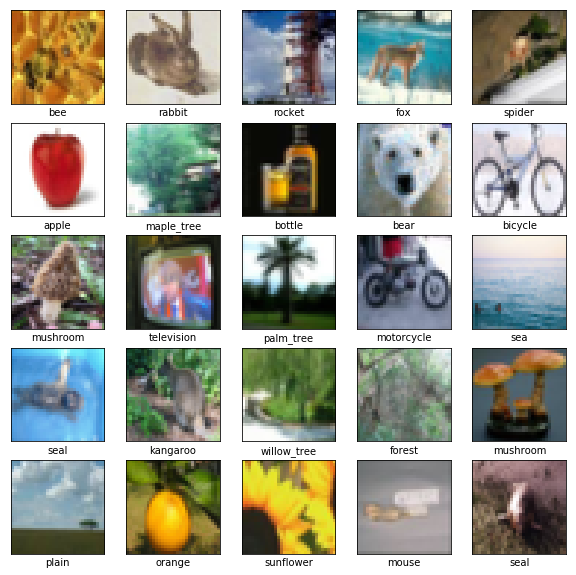

In [127]:
plt.figure(figsize=(10,10))

rand_range = np.random.randint(0, 50000, 25)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[rand_range[i]], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[rand_range[i]][0]])
plt.show()


In [0]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), 
                          activation='relu', 
                          input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), 
                          activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [104]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)             

In [105]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 225s 4ms/sample - loss: 4.1474 - accuracy: 0.0565 - val_loss: 3.8433 - val_accuracy: 0.1003
Epoch 2/20
50000/50000 [==============================] - 225s 4ms/sample - loss: 3.7038 - accuracy: 0.1248 - val_loss: 3.5306 - val_accuracy: 0.1614
Epoch 3/20
50000/50000 [==============================] - 223s 4ms/sample - loss: 3.4217 - accuracy: 0.1715 - val_loss: 3.2743 - val_accuracy: 0.2041
Epoch 4/20
50000/50000 [==============================] - 223s 4ms/sample - loss: 3.2594 - accuracy: 0.2016 - val_loss: 3.1088 - val_accuracy: 0.2434
Epoch 5/20
50000/50000 [==============================] - 222s 4ms/sample - loss: 3.1336 - accuracy: 0.2276 - val_loss: 3.0270 - val_accuracy: 0.2557
Epoch 6/20
50000/50000 [==============================] - 224s 4ms/sample - loss: 3.0326 - accuracy: 0.2493 - val_loss: 2.9378 - val_accuracy: 0.2728
Epoch 7/20
50000/50000 [==========================

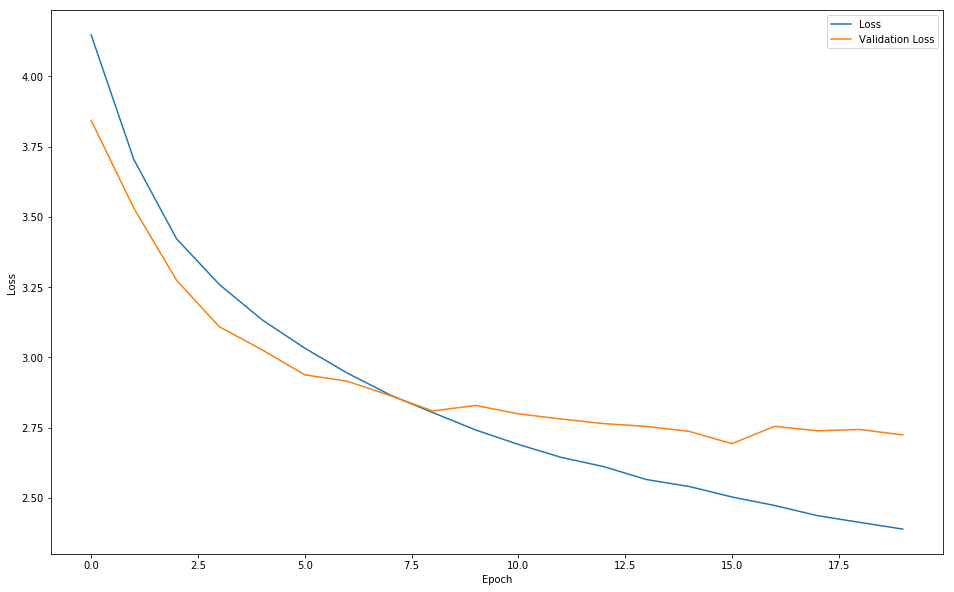

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

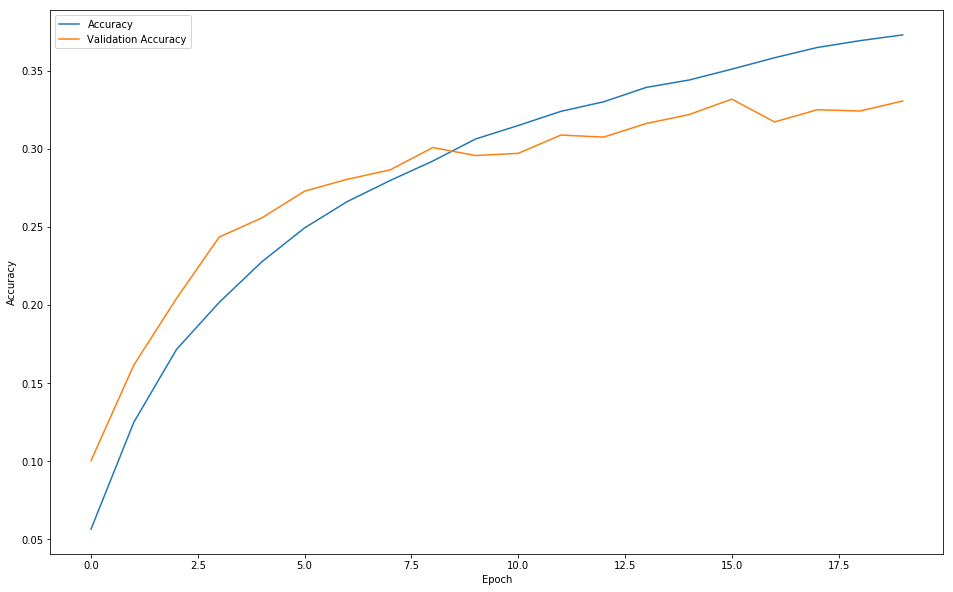

In [113]:
plt.figure(figsize=(16,10))
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [108]:
model.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.723683491897583, 0.3305]

In [116]:
Y_pred = model.predict(X_test)
Y_pred

array([[7.82956340e-06, 8.50483775e-05, 7.88779347e-04, ...,
        2.24113446e-05, 8.77151397e-05, 2.59642303e-03],
       [3.59682599e-05, 5.34943829e-04, 4.35793132e-04, ...,
        3.79613750e-02, 5.41915884e-04, 1.11854617e-02],
       [2.13281401e-05, 5.81977540e-04, 8.24307033e-04, ...,
        6.52526214e-04, 6.10598945e-04, 3.57132987e-04],
       ...,
       [1.17046069e-02, 3.10746580e-03, 1.89920702e-05, ...,
        1.37342984e-04, 1.09107015e-04, 4.80295531e-03],
       [3.90169225e-05, 4.62916032e-05, 4.56332695e-03, ...,
        1.20350495e-02, 5.62858593e-04, 1.74657460e-02],
       [5.91116957e-02, 5.69636235e-04, 5.80334757e-03, ...,
        2.40963345e-05, 1.34718418e-03, 1.23572778e-02]], dtype=float32)

In [119]:
Y_pred_lbl = np.array([[np.argmax(i)] for i in Y_pred])
Y_pred_lbl


array([[30],
       [33],
       [26],
       ...,
       [18],
       [78],
       [45]])

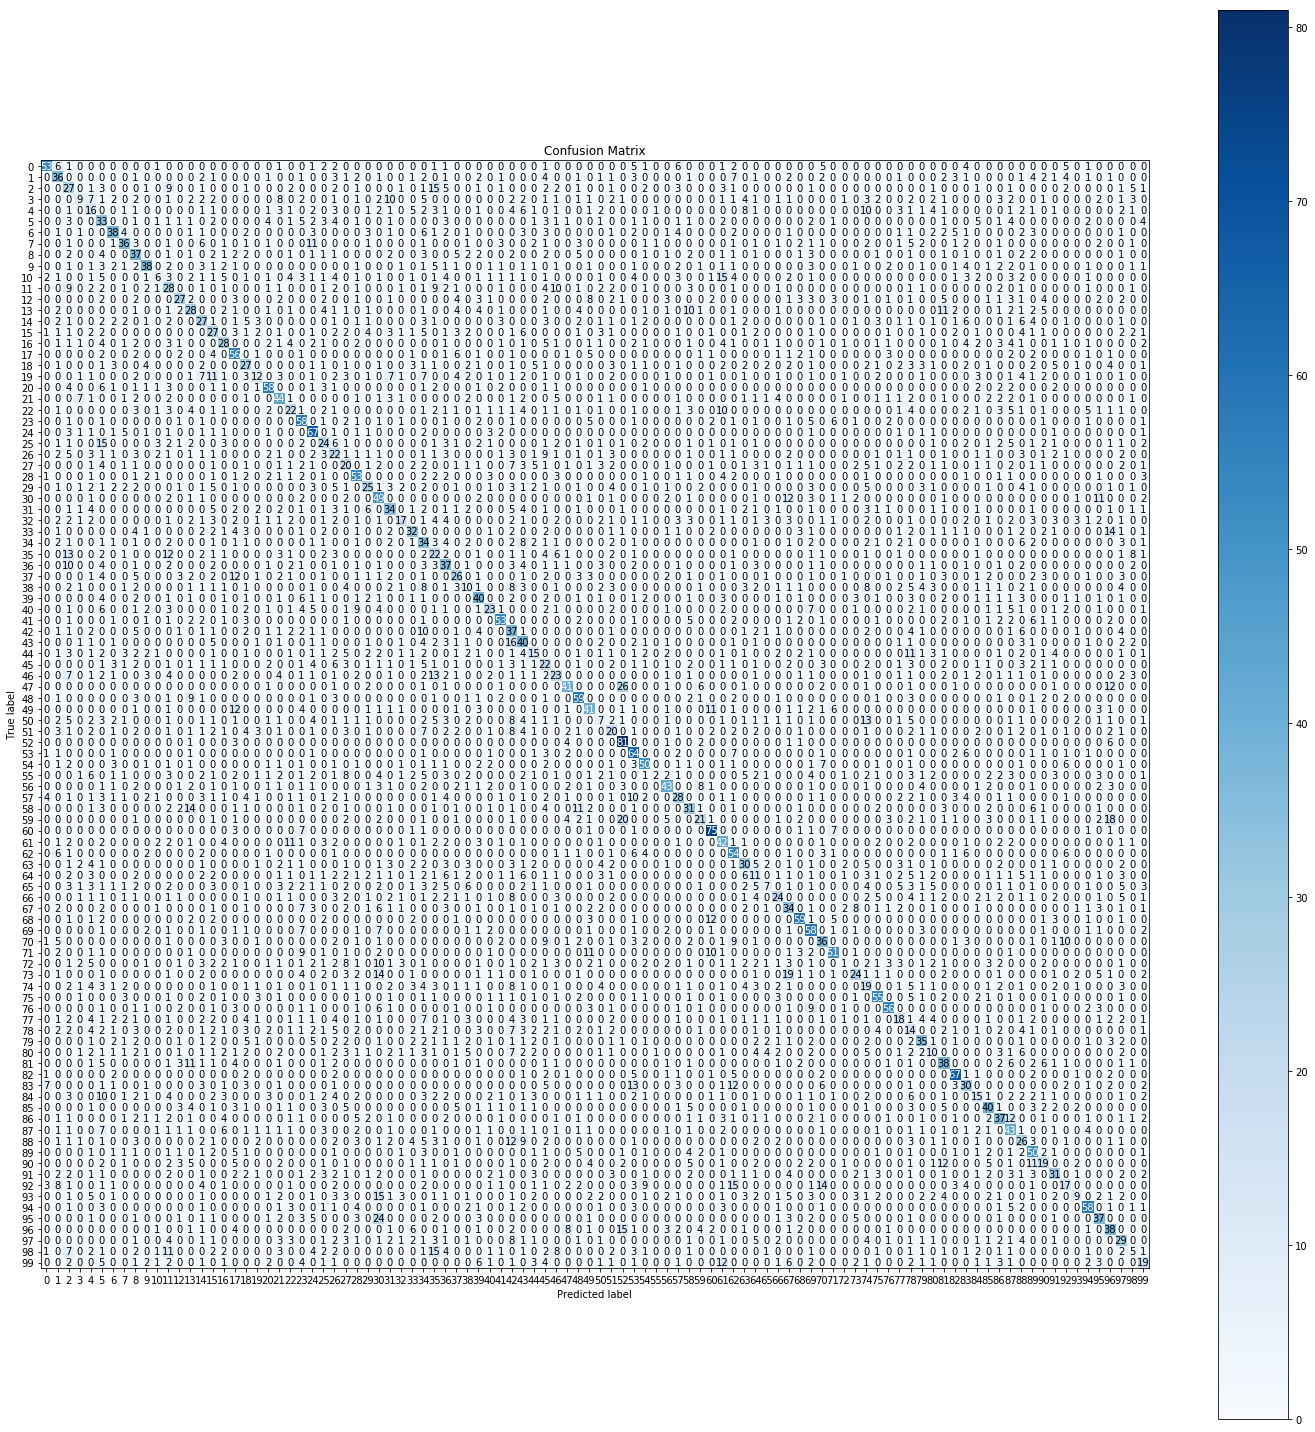

In [120]:
plot_confusion_matrix(Y_test, Y_pred_lbl, size=(20,20))